<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/25_august_2021_fixes/C2/W2/assignment/C2_W2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT LIBRARY
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
# Download Data

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2021-11-08 13:28:00--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 72.246.252.126, 2600:1402:9800:4b7::e59, 2600:1402:9800:48a::e59
Connecting to download.microsoft.com (download.microsoft.com)|72.246.252.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   203MB/s    in 3.9s    

2021-11-08 13:28:05 (203 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
# Check total of cats and dogs images
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [ ]:
# Make Folder for training and test images for both cats and dogs
try:
    classes = ['cats','dogs']
    path = os.path.join('/tmp','cats-v-dogs')
    os.mkdir(path)
    path = os.path.join('/tmp/cats-v-dogs', 'training')
    os.mkdir(path)
    path = os.path.join('/tmp/cats-v-dogs', 'testing')
    os.mkdir(path)
    for class_name in classes:
        path = os.path.join('/tmp/cats-v-dogs/training', class_name)
        os.mkdir(path)
        path = os.path.join('/tmp/cats-v-dogs/testing', class_name)
        os.mkdir(path)
except OSError:
    pass

In [ ]:
# Put the images to correct folder for dogs and cats and split it to training and test folder
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    a=random.sample(os.listdir(SOURCE),len(os.listdir(SOURCE)))
    for item in range(len(a)):
        path=str(SOURCE+a[item])
        if item<(len(a)*SPLIT_SIZE):
            if os.path.getsize(SOURCE+a[item])==0:
                print(a[item]+'is zero length, so ignoring')
            else:
                copyfile(SOURCE+a[item],TRAINING+a[item])
        else:
            if os.path.getsize(SOURCE+a[item])==0:
                print(a[item]+'is zero length, so ignoring')
            else:
                copyfile(SOURCE+a[item],TESTING+a[item])


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpgis zero length, so ignoring
11702.jpgis zero length, so ignoring


In [ ]:
# Check the total of training and test images for both cats and dogs
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))



12382
12372
2382
2372


In [ ]:
# Create CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# Image Augmentation with Image Data Generator
TRAINING_DIR = '/tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,  
    target_size=(300, 300), 
    batch_size=10,
    class_mode='binary')

VALIDATION_DIR ='/tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator(rescale=1./255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')


validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')



Found 24752 images belonging to 2 classes.
Found 4754 images belonging to 2 classes.


In [ ]:
# Run the Model
from datetime import datetime
start = datetime.now()
history = model.fit(train_generator,
                              epochs=25,
                              verbose=1,
                              validation_data=validation_generator)
stop = datetime.now()
time=stop-start
print(time)

Epoch 1/25
 751/2476 [========>.....................] - ETA: 6:02 - loss: 0.7017 - acc: 0.5632

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

2476/2476 [==============================] - 622s 247ms/step - loss: 0.6605 - acc: 0.6236 - val_loss: 0.6084 - val_acc: 0.6752
Epoch 2/25
2476/2476 [==============================] - 604s 244ms/step - loss: 0.6067 - acc: 0.6907 - val_loss: 0.6951 - val_acc: 0.6277
Epoch 3/25
2476/2476 [==============================] - 597s 241ms/step - loss: 0.6058 - acc: 0.7052 - val_loss: 0.5626 - val_acc: 0.7400
Epoch 4/25
2476/2476 [==============================] - 581s 234ms/step - loss: 0.5950 - acc: 0.7104 - val_loss: 0.5314 - val_acc: 0.7448
Epoch 5/25
2476/2476 [==============================] - 582s 235ms/step - loss: 0.5859 - acc: 0.7223 - val_loss: 0.5492 - val_acc: 0.7314
Epoch 6/25
2476/2476 [==============================] - 579s 234ms/step - loss: 0.5793 - acc: 0.7290 - val_loss: 0.5347 - val_acc: 0.7244
Epoch 7/25
2476/2476 [==============================] - 591s 239ms/step - loss: 0.5775 - acc: 0.7334 - val_loss: 0.5404 - val_acc: 0.7478
Epoch 8/25
2476/2476 [=======================

Text(0.5, 1.0, 'Training and validation loss')

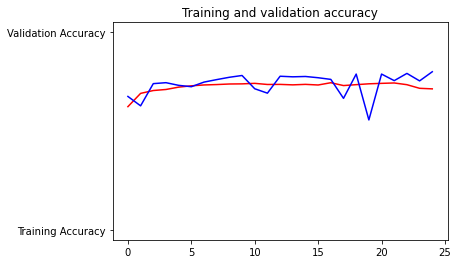

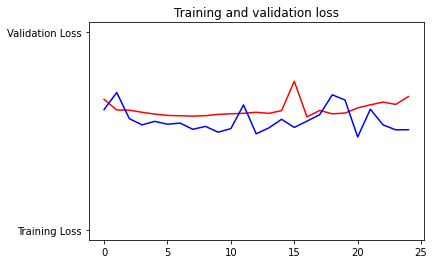

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')


In [ ]:
# Test the prediction 

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

TypeError: ignored